# <span style = "color:coral"> Principal Component Analysis (PCA) </span> 

***

Principal Component Analysis is an unsupervised learning algorithm that is used for the dimensionality reduction in machine learning. It is a statistical process that converts the observations of correlated features into a set of linearly uncorrelated features with the help of orthogonal transformation. These new transformed features are called the Principal Components. It is one of the popular tools that is used for exploratory data analysis and predictive modeling. It is a technique to draw strong patterns from the given dataset by reducing the variances.

### Step By Step Computation Of PCA
The below steps need to be followed to perform dimensionality reduction using PCA:

1. Standardization of the data
2. Computing the covariance matrix
3. Calculating the eigenvectors and eigenvalues
4. Computing the Principal Components
5. Reducing the dimensions of the data set

### PCA Using Sklearn Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Load Breast cancer dataset from sklearn library

In [2]:
from sklearn.datasets import load_breast_cancer
  
# instantiating
cancer = load_breast_cancer()
  
# creating dataframe
df = pd.DataFrame(cancer['data'], columns = cancer['feature_names'])

#### checking head of dataframe

In [3]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#### Import StandardScaler from sklearn preprocessing

In [4]:
from sklearn.preprocessing import StandardScaler

#### Scale the data

In [5]:
scalar = StandardScaler()
  
scaled_data = scalar.fit_transform(df)

#### Import PCA from sklearn Sklearn decomposition

In [6]:
from sklearn.decomposition import PCA

In [7]:
# Let, components = 2
pca = PCA(n_components = 2) # n_components is used to specify the number of features we want in our dataset

# Fit Transform our scaled data
x_pca = pca.fit_transform(scaled_data)

In [9]:
pd.DataFrame(x_pca)

,0,1
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072
...,...,...
564,6.439315,-3.576817
565,3.793382,-3.584048
566,1.256179,-1.902297
567,10.374794,1.672010


#### Check the shape

In [9]:
x_pca.shape

(569, 2)

We've reduced 30 dimensions to just 2! Let's plot these two dimensions out!

#### Visualizing PCA

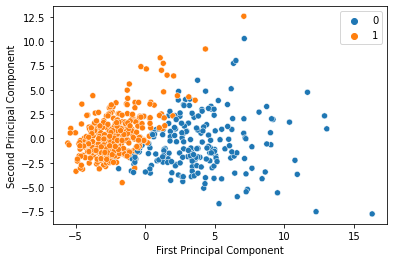

In [10]:
sns.scatterplot(x = x_pca[:, 0], y = x_pca[:, 1] , hue = cancer['target'])
# labeling x and y axes
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

#### Interpreting the components

Unfortunately, with this great power of dimensionality reduction, comes the cost of being able to easily understand what these components represent.

The components correspond to combinations of the original features, the components themselves are stored as an attribute of the fitted PCA object:

In [11]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

<b>In this numpy matrix array, each row represents a principal component, and each column relates back to the original features. we can visualize this relationship with a heatmap:</b>

In [12]:
df_comp = pd.DataFrame(pca.components_,columns=cancer['feature_names'])

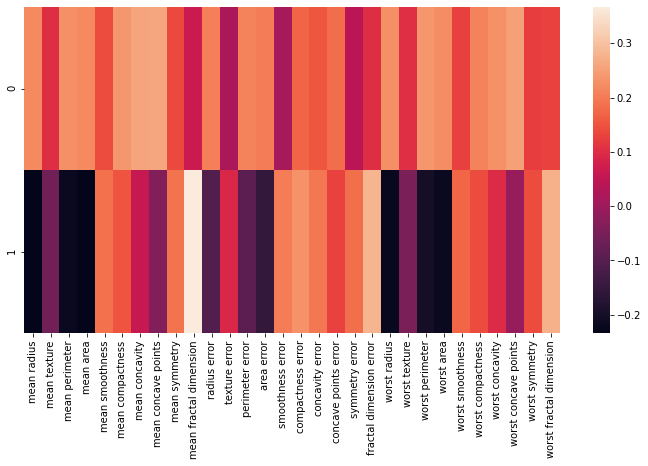

In [16]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp)
plt.show()

This heatmap and the color bar basically represent the correlation between the various feature and the principal component itself.

***

# <center><span style = "color:CornflowerBlue; font-family:Courier New;font-size:40px">EDURE LEARNING</span></center>